# Homework 2

## Apartment prices

We are going to analyse data on sales of apartments in Ekhagen. We start by reading in the data.

In [115]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv')

We add a column with price per square meters (ppsqm).

In [117]:
df['ppsqm'] = df['soldPrice']/df['livingArea'] #calcualte ppsqm

relevent_df = df[['livingArea', 'soldPrice','ppsqm']]
relevent_df.head()

,livingArea,soldPrice,ppsqm
0,73.0,3820000,52328.767123
1,36.0,2355000,65416.666667
2,81.0,6110000,75432.098765
3,107.0,8050000,75233.644860
4,29.0,2400000,82758.620690


Now we want to creat a table of the top 5 apartments with the highest price per square meter.

In [116]:
top_5 = relevent_df.sort_values('ppsqm', ascending = False).head(5) 
top_5

,livingArea,soldPrice,ppsqm
67,24.0,2500000,104166.666667
50,24.0,2450000,102083.333333
54,23.0,2300000,100000.000000
34,25.0,2210000,88400.000000
55,26.9,2300000,85501.858736


Calculate the average price per square meters in Ekhagen.

In [13]:
ppsqm_mean = df['ppsqm'].mean()
ppsqm_mean

58759.382760081746

We sort the apartments by the living area.

In [29]:
sorted_df = relevent_df.sort_values('livingArea')

sorted_df

,livingArea,soldPrice,ppsqm
150,20.0,1300000,65000.000000
155,23.0,1450000,63043.478261
54,23.0,2300000,100000.000000
50,24.0,2450000,102083.333333
67,24.0,2500000,104166.666667
...,...,...,...
107,128.3,6025000,46960.249415
106,131.0,5600000,42748.091603
68,138.0,6450000,46739.130435
59,152.0,9250000,60855.263158


Something interesting from the table above is that the apartment with the smallest living area have higher price per square meter than the apartment with the largest living area.

## The Swedish Election of 2018

We start by reading the data.

In [54]:
election_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv', delimiter= ';', decimal=',')

Now we select the municipalities in Stockholm and calculate the sum of the legitimate votes.

In [69]:
election_df\
    [election_df['LÄNSNAMN'] == 'Stockholms län']\
    ['RÖSTER GILTIGA']\
    .sum()

1426237

We now sort the municipalities by the highest voting percentage for the social democratic party.

In [62]:
election_df\
    [['KOMMUNNAMN', 'S']]\
    .sort_values('S', ascending = False)

,KOMMUNNAMN,S
188,Munkfors,52.18
286,Piteå,47.48
196,Hagfors,47.46
279,Överkalix,46.68
280,Kalix,45.37
...,...,...
133,Kungsbacka,16.32
13,Täby,13.99
21,Lidingö,12.35
98,Vellinge,10.58


From the table above we can se that Munkfors is the municipality that have the highest voting percentage for the social democratic party.
Now we create a table of the three municipalities with the highest participation.

In [60]:
election_df\
    [['KOMMUNNAMN', 'VALDELTAGANDE']]\
    .sort_values('VALDELTAGANDE', ascending = False)\
    .head(3)\
    

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


## Predicting Strokes

We start by reading in the data.

In [111]:
strokes_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')

We creat a new column that specify in which age group the person is in and sets the interval to 5 years.

In [108]:
strokes_df['age_groups'] = pd.cut(strokes_df['age'], bins = range(0,101,5), right = False)

relevent_strokes_df = strokes_df[['age_groups', 'stroke']]
relevent_strokes_df.head()

,age_groups,stroke
0,"[65, 70)",1
1,"[60, 65)",1
2,"[80, 85)",1
3,"[45, 50)",1
4,"[75, 80)",1


Now we plot the amount of strokes in the different age groups.

<AxesSubplot:xlabel='age_groups'>

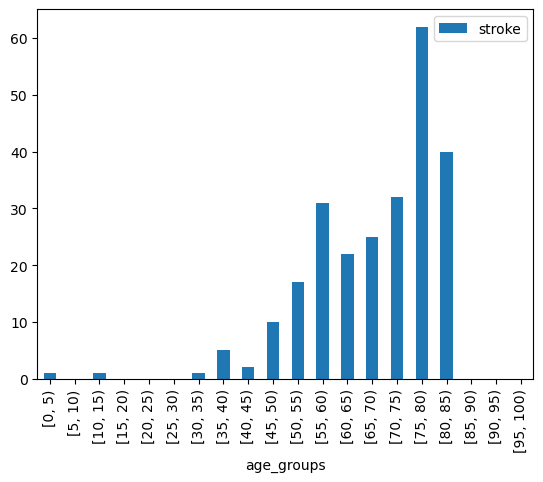

In [118]:
relevent_strokes_df.groupby('age_groups').sum().plot.bar()

From the plot above we can conclude that age seems to have an impact on strokes occurrence.